#  Analysis & Prediction of Cryptocurrencies 

Due to COVID-19, an exponential increase in new cryptocurrency traders, this project will focus on evaluating and forecasting the potential of cryptocurrency if COVID-19 had not occurred, as well as predicting the future of cryptocurrency post COVID-19.

We will focus on analyzing and predicting the 6 cryptocurrencies that blew up during COVID-19:

- Bitcoin (BTC)
- Ethereum (ETH)
- Dogecoin (DOGE)
- Dash (DASH)
- Ripple (XRP)
- Litecoin (LTC)

In [1]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import datetime as dt
import yfinance as yf
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter

## 1. Preprocessing

### 1.1 Collect Data

In [2]:
currency = "USD"
metric= "Close"

start= dt.datetime(2018, 1, 1)
end= dt.datetime.now()

crypto= ["BTC", "ETH", "DOGE", "DASH", "XRP", "LTC"] 

colnames = []

In [3]:
first = True
for i in crypto:
    data = web.DataReader(f'{i}-{currency}', "yahoo", start, end)
    if  first:
        combined = data[[metric]].copy()
        colnames.append(i)
        combined.columns= colnames
        first= False
    else:
        combined= combined.join(data[metric])
        colnames.append(i)
        combined.columns = colnames
                    

<br>

## 2. Data visualizations

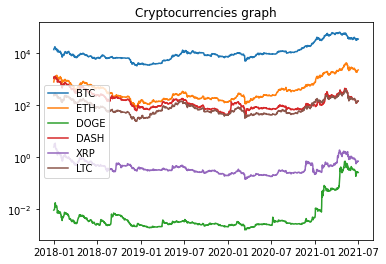

In [4]:
plt.yscale('log')

for i in crypto:
    plt.plot(combined[i], label=i)
plt.legend(loc="center left")
plt.title('Cryptocurrencies graph')


plt.show()
    

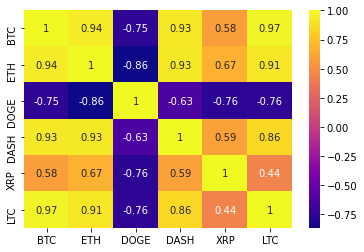

In [33]:
combined= combined.pct_change().corr(method="pearson")
sns.heatmap(combined, annot=True, cmap='plasma')

plt.show()

We can observe that Dogecoin has the lowest negative correlation to Bitcoin, Dash, Ripple, and Litecoin; notably Ethereum, which has a negative correlation of 0.86: indicating that as DOGE goes up, Ethereum goes down. The strongest positive connection exists between Ethereum and bitcoin.

<br>

In [6]:

strt= dt.date(end.year-1,end.month,end.day)
kc=['BTC-USD', "ETH-USD", "DOGE-USD", "DASH-USD", "XRP-USD", "LTC-USD"]

df=web.get_data_yahoo(kc,strt,end)["Adj Close"]
daily_returns=df.pct_change().dropna(axis=0)


In [7]:
daily_returns.head()

Symbols,BTC-USD,ETH-USD,DOGE-USD,DASH-USD,XRP-USD,LTC-USD
Date,,,,,,
2020-06-30,0.009885,0.021202,0.014655,0.002354,0.006289,0.005582
2020-07-01,-0.011369,-0.007448,0.002974,-0.012060,0.001514,-0.005120
2020-07-02,-0.003958,-0.017460,-0.019060,-0.014226,-0.005123,-0.006764
2020-07-03,0.004972,0.016359,-0.003022,0.015360,0.009346,0.020905
2020-07-04,-0.006411,-0.006153,0.000000,-0.003647,-0.005433,-0.011136


In [8]:
daily_cum_returns = (daily_returns +1).cumprod() -1

In [9]:
daily_cum_returns


Symbols,BTC-USD,ETH-USD,DOGE-USD,DASH-USD,XRP-USD,LTC-USD
Date,,,,,,
2020-06-30,0.009885,0.021202,0.014655,0.002354,0.006289,0.005582
2020-07-01,-0.001596,0.013597,0.017672,-0.009734,0.007813,0.000433
2020-07-02,-0.005547,-0.004100,-0.001724,-0.023822,0.002650,-0.006334
2020-07-03,-0.000602,0.012191,-0.004741,-0.008827,0.012020,0.014439
2020-07-04,-0.007009,0.005963,-0.004741,-0.012442,0.006522,0.003142
...,...,...,...,...,...,...
2021-06-25,2.522248,7.082713,104.510345,0.824279,2.499375,2.054353
2021-06-26,2.791822,7.743984,112.987076,0.862726,2.678416,2.191583
2021-06-27,2.768260,8.189216,109.714229,0.932891,2.660351,2.312712


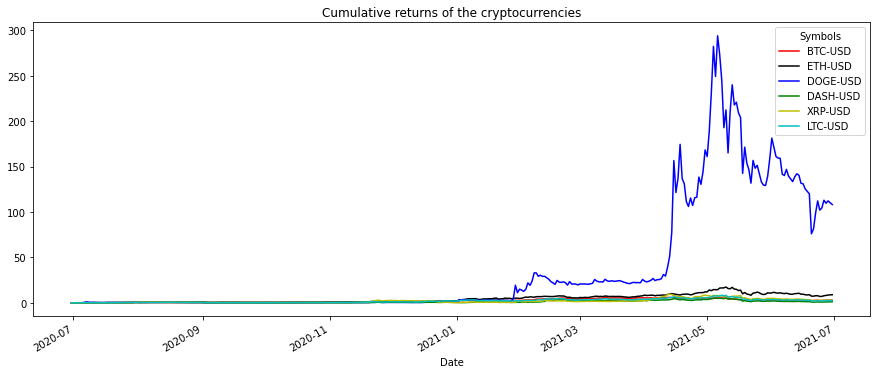

In [10]:
colors=["r","k","b","g","y","c"]
daily_cum_returns.plot(color=colors, figsize=(15,6))
plt.title('Cumulative returns of the cryptocurrencies')
plt.show()

From February 2021 to May 2021, Dogecoin had the largest aggregate amount of investment, as it rose rapidly.

<br>

### 2.1 Comparison of Graphs

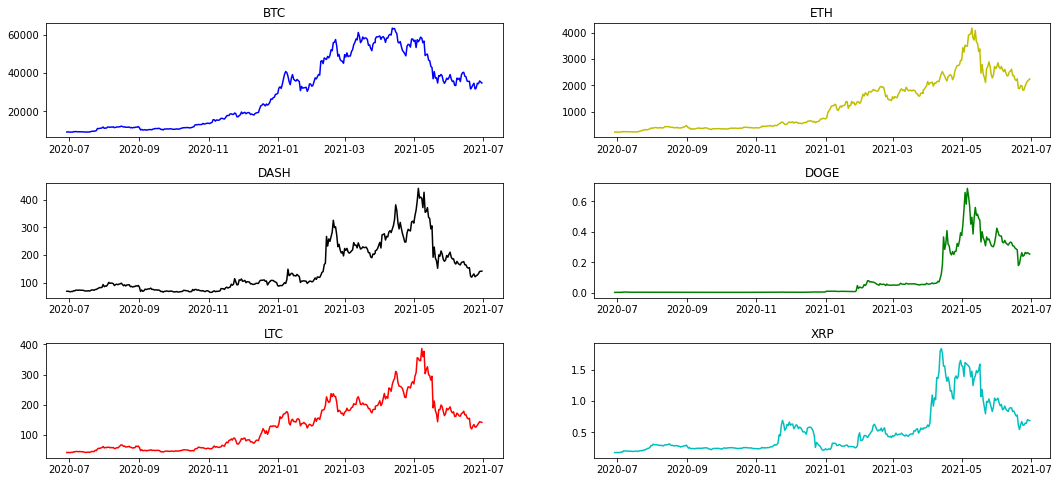

In [11]:
fig, axs = plt.subplots(3,2,figsize=(18,8), gridspec_kw={"hspace":0.4,"wspace":0.2})

axs[0,0].plot(df['BTC-USD'],c="b")
axs[0,0].set_title('BTC')

axs[0,1].plot(df['ETH-USD'],c="y")
axs[0,1].set_title('ETH')

axs[1,0].plot(df['DASH-USD'],c="k")
axs[1,0].set_title('DASH')

axs[1,1].plot(df['DOGE-USD'],c="g")
axs[1,1].set_title('DOGE')

axs[2,0].plot(df['LTC-USD'],c="r")
axs[2,0].set_title('LTC')

axs[2,1].plot(df['XRP-USD'],c="c")
axs[2,1].set_title('XRP')

plt.show()

Up until the end May 2021, the price of all cryptocurrencies increased in comparison to each other. 

### 2.2 Comparison of Volatilies

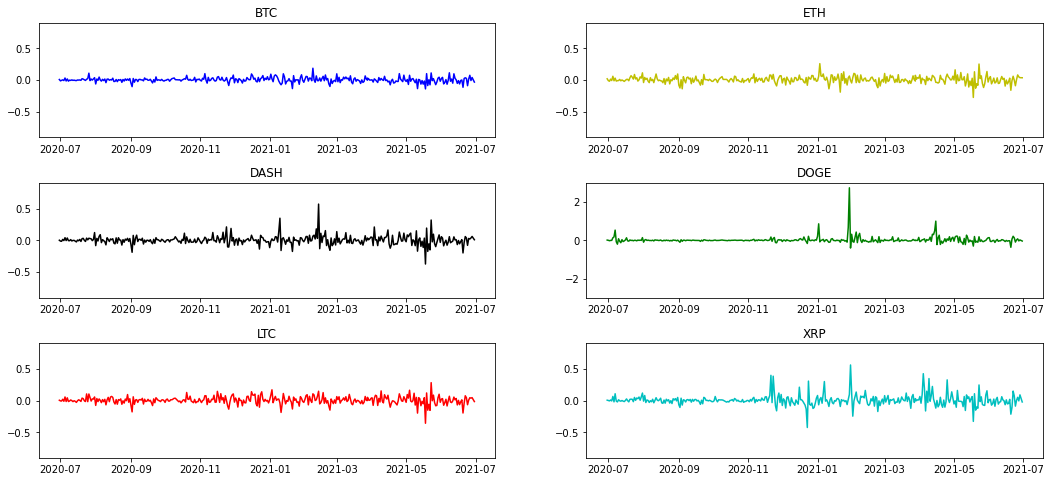

In [12]:
fig, axs = plt.subplots(3,2,figsize=(18,8), gridspec_kw={"hspace":0.4,"wspace":0.2})

axs[0,0].plot(daily_returns['BTC-USD'],c="b")
axs[0,0].set_title('BTC')
axs[0,0].set_ylim([-0.9,0.9])

axs[0,1].plot(daily_returns['ETH-USD'],c="y")
axs[0,1].set_title('ETH')
axs[0,1].set_ylim([-0.9,0.9])

axs[1,0].plot(daily_returns['DASH-USD'],c="k")
axs[1,0].set_title('DASH')
axs[1,0].set_ylim([-0.9,0.9])

axs[1,1].plot(daily_returns['DOGE-USD'],c="g")
axs[1,1].set_title('DOGE')
axs[1,1].set_ylim([-3,3])

axs[2,0].plot(daily_returns['LTC-USD'],c="r")
axs[2,0].set_title('LTC')
axs[2,0].set_ylim([-0.9,0.9])

axs[2,1].plot(daily_returns['XRP-USD'],c="c")
axs[2,1].set_title('XRP')
axs[2,1].set_ylim([-0.9,0.9])

plt.show()

During COVID-19, DASH and XRP were the most volatile cryptocurrency.

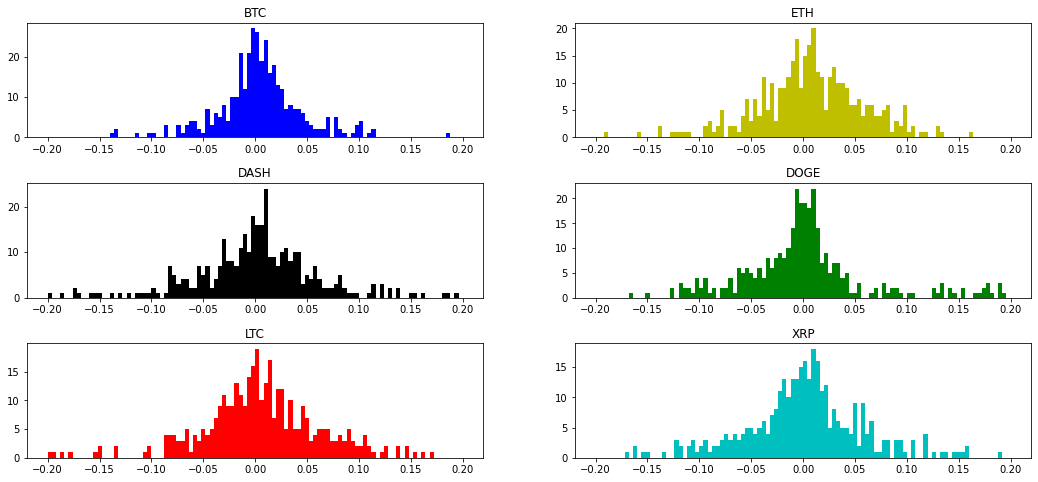

In [13]:
fig, axs = plt.subplots(3,2,figsize=(18,8), gridspec_kw={"hspace":0.4,"wspace":0.2})

axs[0,0].hist(daily_returns['BTC-USD'], bins=100, color='b',range=(-0.2,0.2))
axs[0,0].set_title('BTC')

axs[0,1].hist(daily_returns['ETH-USD'], bins=100, color='y',range=(-0.2,0.2))
axs[0,1].set_title('ETH')

axs[1,0].hist(daily_returns['DASH-USD'], bins=100, color='k',range=(-0.2,0.2))
axs[1,0].set_title('DASH')

axs[1,1].hist(daily_returns['DOGE-USD'], bins=100, color='g',range=(-0.2,0.2))
axs[1,1].set_title('DOGE')

axs[2,0].hist(daily_returns['LTC-USD'], bins=100, color='r',range=(-0.2,0.2))
axs[2,0].set_title('LTC')

axs[2,1].hist(daily_returns['XRP-USD'], bins=100, color='c',range=(-0.2,0.2))
axs[2,1].set_title('XRP')


plt.show()

The normal distributions of all cryptocurrencies during COVID-19 demonstrate that there was a possibility of getting a positive return on investment, since all graphs peak on the positive side of the graph.

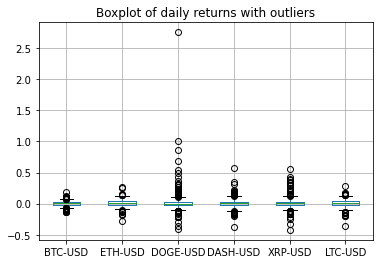

In [14]:
daily_returns.boxplot()
plt.title("Boxplot of daily returns with outliers")
plt.show()

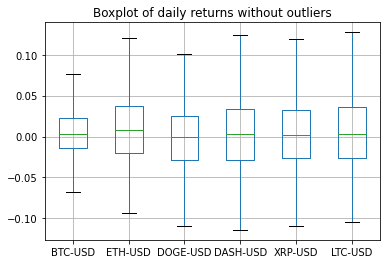

In [15]:
daily_returns.boxplot(showfliers=False)
plt.title("Boxplot of daily returns without outliers")
plt.show()

All median are positive showing positive return on investments.

## Do the cryptocurrency returns explain each other?

In [16]:
import statsmodels.api as sm

y= daily_returns['BTC-USD']
x1= daily_returns[["ETH-USD"]]
x2=daily_returns[["ETH-USD", "DOGE-USD"]]
x3=daily_returns[["ETH-USD", "DOGE-USD", "DASH-USD"]]
x4= daily_returns[[ "ETH-USD", "DOGE-USD", "DASH-USD", "XRP-USD"]]
x5= daily_returns[["ETH-USD", "DOGE-USD", "DASH-USD", "XRP-USD", "LTC-USD"]]

x1= sm.add_constant(x1)
x2= sm.add_constant(x2)
x3= sm.add_constant(x3)
x4= sm.add_constant(x4)
x5= sm.add_constant(x5)

In [17]:
model1= sm.OLS(y,x1)
model2= sm.OLS(y,x2)
model3= sm.OLS(y,x3)
model4= sm.OLS(y,x4)
model5= sm.OLS(y,x5)

r1= model1.fit()
r2= model2.fit()
r3= model3.fit()
r4= model4.fit()
r5= model5.fit()

In [18]:
r1.rsquared

0.5195706618424654

In [19]:
r2.rsquared

0.5332349096845233

In [20]:
r3.rsquared

0.5644030568486436

In [21]:
r4.rsquared

0.5684470182584018

In [22]:
r5.rsquared

0.6261883724565791

rsquared5, a mix of Ethereum (ETH), Dogecoin (DOGE), Dash (DASH), Ripple (XRP), and Litecoin (LTC), has the best chance of predicting Bitcoin's movement (BTC)

## 3. Prediction of Cryptocurrency Prices

In [23]:
from fbprophet import Prophet
import warnings

warnings.simplefilter(action='ignore',category=FutureWarning)
ed1=dt.date(end.year - 2, end.month,end.day)
ed2= dt.date(end.year - 1  , end.month, end.day)
strt1= dt.date(ed1.year - 3, end.month - 3, end.day)

df1=web.get_data_yahoo(kc,strt1,ed1)["Adj Close"]
df2=web.get_data_yahoo(kc,strt1,ed2)["Adj Close"]



Importing plotly failed. Interactive plots will not work.


In [24]:
mod1 = Prophet()
df1 = df1.reset_index()
df1[['ds','y']]=df1[["Date", "BTC-USD"]]
mod1.fit(df1)

mod2 = Prophet()
df2=df2.reset_index()
df2[['ds','y']]=df2[["Date", "BTC-USD"]]
mod2.fit(df2)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future1= mod1.make_future_dataframe(periods=365*2)

In [26]:
future2= mod2.make_future_dataframe(periods=180*2)

In [27]:
forecast1=mod1.predict(future1)
forecast2=mod2.predict(future2)

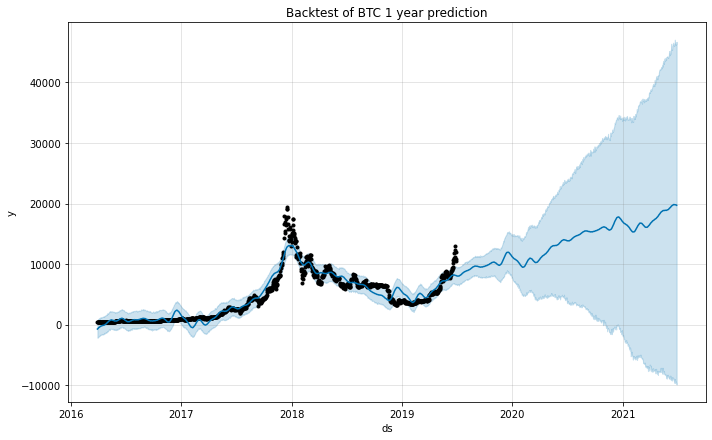

In [28]:
mod1.plot(forecast1)
plt.title("Backtest of BTC 1 year prediction")
plt.show()

The previous forecast of BTC indicates a growth of BTC through time for the next 2 years, which true but exponetial growth to a higher degreee. It depicts a probable increase of bitcoin similar to what it is now.

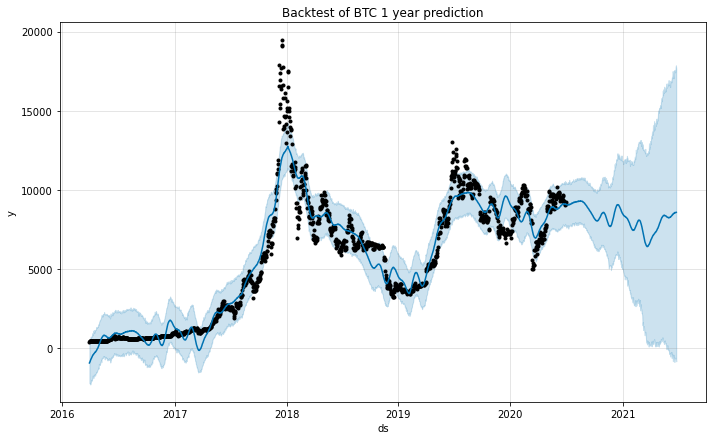

In [29]:
mod2.plot(forecast2)
plt.title("Backtest of BTC 1 year prediction")
plt.show()

The previous forecast of BTC indicates no change in BTC price, which is the wrong bitcoin price compared to right now.

## 4.  Predictive price for BTC for the year 2022

In [30]:
df3=web.get_data_yahoo(kc,strt1,end)["Adj Close"]

mod3 = Prophet()
df3 = df3.reset_index()
df3[['ds','y']]=df3[["Date", "BTC-USD"]]
mod3.fit(df3)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
future3= mod3.make_future_dataframe(periods=365)
forecast3=mod3.predict(future3)

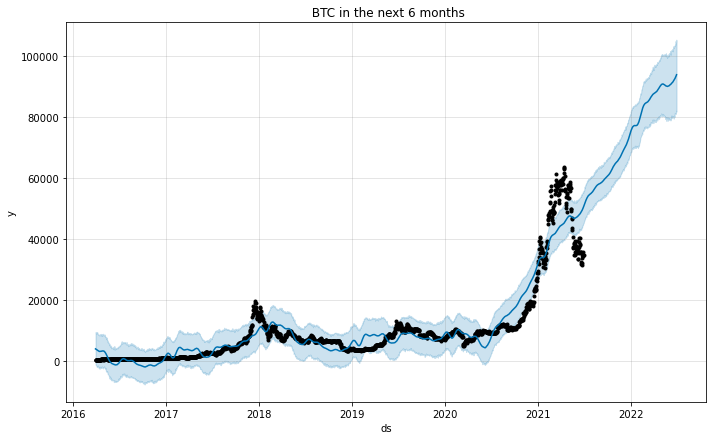

In [32]:
mod3.plot(forecast3)
plt.title(" BTC in the next 6 months")
plt.show()

The time series, fbprophet predicts a further increase in bitcoin in the next year from 30 000 USD to 100 000 USD. Though from the news, it doesnt seem so; as the central banks in many country seem hesitant. 